<a href="https://colab.research.google.com/github/NuttyLee22/Image-Dimensionality-Reduction/blob/main/mnist_autoencoder_convolutional_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape


In [2]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# dimensões 28x28 e 1 canal (escalas)
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), 28, 28, 1))

In [4]:
# dimensões 28x28 e 1 canal (escalas)
previsores_teste = previsores_teste.reshape((len(previsores_teste), 28, 28, 1))

In [5]:
# escala de 0 e 1
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [6]:
# Codificação

autoencoder = Sequential()
# Conv2D
autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape=(28,28,1)))
# MaxPolling2D
autoencoder.add(MaxPooling2D(pool_size = (2,2)))
# Camada oculta
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding='same'))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding='same', strides = (2,2)))
# Flattening
autoencoder.add(Flatten())
# 4, 4, 8 - (vetor de 128 dimensões)
autoencoder.add(Reshape((4,4,8)))

In [7]:
# Decodificação

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))
# obs - ultimo elemento não deve ter padding 'same'
autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
autoencoder.add(UpSampling2D(size = (2,2)))
# saída (apenas uma imagem como filtro)
autoencoder.add(Conv2D(filters = 1, kernel_size = (3,3), activation = 'sigmoid', padding='same'))

In [8]:
# Estrutura da rede neural
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [9]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

# auto tempo de processamento, coloquei apenas 10 épocas...
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 10, batch_size = 256, 
                validation_data = (previsores_teste, previsores_teste))

Epoch 1/10
235/235 [==============================] - 106s 429ms/step - loss: 0.2730 - accuracy: 0.7949 - val_loss: 0.1671 - val_accuracy: 0.7958
Epoch 2/10
235/235 [==============================] - 84s 357ms/step - loss: 0.1527 - accuracy: 0.8004 - val_loss: 0.1396 - val_accuracy: 0.8027
Epoch 3/10
235/235 [==============================] - 83s 355ms/step - loss: 0.1335 - accuracy: 0.8053 - val_loss: 0.1265 - val_accuracy: 0.8069
Epoch 4/10
235/235 [==============================] - 84s 357ms/step - loss: 0.1240 - accuracy: 0.8073 - val_loss: 0.1194 - val_accuracy: 0.8075
Epoch 5/10
235/235 [==============================] - 86s 367ms/step - loss: 0.1183 - accuracy: 0.8085 - val_loss: 0.1148 - val_accuracy: 0.8078
Epoch 6/10
235/235 [==============================] - 84s 359ms/step - loss: 0.1143 - accuracy: 0.8093 - val_loss: 0.1111 - val_accuracy: 0.8091
Epoch 7/10
235/235 [==============================] - 82s 347ms/step - loss: 0.1107 - accuracy: 0.8100 - val_loss: 0.1086 - val_a

In [10]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584   

In [11]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

313/313 [==============================] - 6s 18ms/step


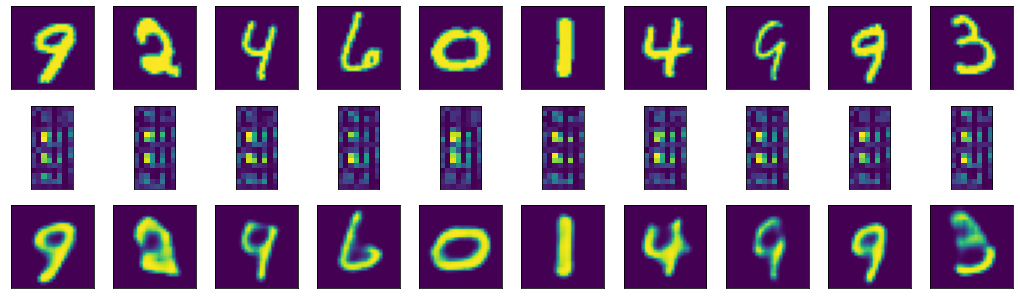

In [12]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16,8))
    plt.xticks(())
    plt.yticks(())
    
     # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())